Lets calculate the population mean first, which we calculate as:

μ = sum of all elements / N (where N is population size)

In [1]:
# Import necessary libraries
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import itertools

Create two lists with pumpkin name and respective pumpkin weights. Combine the lists to create a pumpkin directory with name as keys and weights as values.

In [3]:
# Create two lists with pumpkin names and weights
pumpkin = ['A', 'B', 'C', 'D', 'E', 'F']
weights = [19, 14, 15, 9, 10, 17]
# Combine both lists to create a dictionary
pumpkin_dict = {}
for i in range(len(pumpkin)):
    pumpkin_dict[pumpkin[i]] = weights[i]
print (pumpkin_dict)

{'A': 19, 'B': 14, 'C': 15, 'D': 9, 'E': 10, 'F': 17}


In [4]:
# Calculate the population mean from pumpkin_dict

def calculate_mu(x):

    # USe the formula for mu given above
    d = float(sum(x.values())) / len(x)    

    return (d)   

mu = calculate_mu(pumpkin_dict)
mu

14.0

Lets use the data we have so far to visualise the weights of individual pumpkins and mean weight.

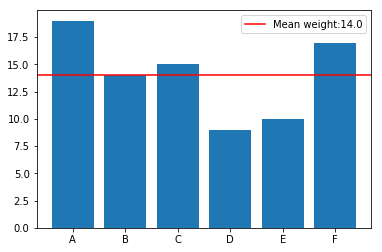

In [6]:
# Plot a bar graph showing weights of pumpkins and highlight the mean weight
plt.bar(range(len(pumpkin_dict)), pumpkin_dict.values(), align='center')
plt.xticks(range(len(pumpkin_dict)), list(pumpkin_dict.keys()))
plt.axhline(y=mu, color='r', linestyle='-', 
            label = "Mean weight:" + str(mu))
plt.legend()
plt.show()

In [7]:
# Identify a sample size n 
n = 2 

# Use itertools.combinations() to generate a list of combinations
combs = list(itertools.combinations(pumpkin_dict, n))

print ("Using", n, "samples, we can see", len(combs), "possible combinations as below:")
print (combs)

Using 2 samples, we can see 15 possible combinations as below:
[('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'E'), ('A', 'F'), ('B', 'C'), ('B', 'D'), ('B', 'E'), ('B', 'F'), ('C', 'D'), ('C', 'E'), ('C', 'F'), ('D', 'E'), ('D', 'F'), ('E', 'F')]


In [8]:
def sample_means(sample_size, data):

    """
    This function takes in population data as a dictionary along with a chosen sample size 
    to generate all possible combinations of given sample size. 
    The function calculates the mean of each sample and returns:
    a) a list of all combinations ( as tuples ) 
    b) a list of means for all sample
    """

    n = sample_size

    # Calculate the mean of population
    mu = calculate_mu(data)
    #print ("Mean of population is:", mu)

    # Generate all possible combinations using given sample size

    combs = list(itertools.combinations(data, n))
    print ("Using", n, "samples with a population of size, we can see", len(combs), "possible combinations ")
    
    # Calculate the mean weight (x_bar) for all the combinations (samples) using the given data
    x_bar_list = []

    # Calculate sample mean for all combinations
    for i in range(len(combs)):
        sum = 0

        for j in range(n):
            key = combs[i][j]
            val =data[str(combs[i][j])]
            sum += val

        x_bar = sum/n
        x_bar_list.append(x_bar)
    print ("The mean of all sample means mu_x_hat is:", np.mean(x_bar_list))

    return combs, x_bar_list

n = 2 #Sample size

combs, means = sample_means(n, pumpkin_dict)

# Print the sample combinations with their means
for c in range(len(combs)):
    print (c+1, combs[c], means[c])

Using 2 samples with a population of size, we can see 15 possible combinations 
The mean of all sample means mu_x_hat is: 14.0
1 ('A', 'B') 16.5
2 ('A', 'C') 17.0
3 ('A', 'D') 14.0
4 ('A', 'E') 14.5
5 ('A', 'F') 18.0
6 ('B', 'C') 14.5
7 ('B', 'D') 11.5
8 ('B', 'E') 12.0
9 ('B', 'F') 15.5
10 ('C', 'D') 12.0
11 ('C', 'E') 12.5
12 ('C', 'F') 16.0
13 ('D', 'E') 9.5
14 ('D', 'F') 13.0
15 ('E', 'F') 13.5


In [9]:
def calculate_probability(means):
    '''
    Input: a list of means (x_hats)
    Output: a list of probablitity of each mean value
    '''
    #Calculate the frequency of each mean value
    freq = Counter(means)

    prob = []
    # Calculate and append fequency of each mean value in the prob list. 
    for element in means:
        for key in freq.keys():
            if element == key:
                prob.append(str(freq[key])+"/"+str(len(means)))
    return prob
    
probs = calculate_probability(means)

# Print combinations with sample means and probability of each mean value
for c in range(len(combs)):
    print (c+1, combs[c], means[c], probs[c])


1 ('A', 'B') 16.5 1/15
2 ('A', 'C') 17.0 1/15
3 ('A', 'D') 14.0 1/15
4 ('A', 'E') 14.5 2/15
5 ('A', 'F') 18.0 1/15
6 ('B', 'C') 14.5 2/15
7 ('B', 'D') 11.5 1/15
8 ('B', 'E') 12.0 2/15
9 ('B', 'F') 15.5 1/15
10 ('C', 'D') 12.0 2/15
11 ('C', 'E') 12.5 1/15
12 ('C', 'F') 16.0 1/15
13 ('D', 'E') 9.5 1/15
14 ('D', 'F') 13.0 1/15
15 ('E', 'F') 13.5 1/15
